In [1]:
####################################################################################
#                CHURN AND HAPPINESS - ANNABELLE CHUINARD - DEEPND                 # 
#                               PART 1: DATA SIS                                  #
####################################################################################

In [2]:
import numpy as np 
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
samplePath = '/home/anabel/DeepND/Happiness/'

In [4]:
# Assigning feature name to each column of the samples and binarizing true/false features


#column_header_churn = ["employeeID", "companyID", "numProbe", "lastDate", "churn"]

df_churn = pd.read_csv( 
    samplePath + 'churn_clean.csv',
    sep = ',',
    index_col=0,
    engine = 'python') 

df_probe = pd.read_csv( 
    samplePath + 'probe_clean.csv',
    skiprows=[1],
    sep = ',', 
    index_col=0,
    engine = 'python') 

df_comReact = pd.read_csv(
    samplePath + 'comReact_clean.csv',
    sep = ',',
    index_col=0,
    engine = 'python') 

df_comPub = pd.read_csv(
    samplePath + 'comPub_clean.csv',
    sep = ',',
    skiprows=[1],
    index_col=0,
    engine = 'python') 


In [5]:
df_churn.head()

employeeID  companyID  numProbe             lastDate  churn  lastDateMonth
0      1_512          1         4  2017-02-23 12:48:04   True              2
1       1_-2          1         0  2017-01-18 14:00:55  False              1
2        1_2          1        72  2017-03-17 01:00:00   True              3
3      1_487          1        14  2016-11-19 15:02:14  False             11
4        1_3          1        22  2017-02-16 01:00:00   True              2

In [6]:
df_probe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221231 entries, 1 to 221231
Data columns (total 7 columns):
employeeID        221231 non-null object
companyID         221231 non-null int64
probeDate         221231 non-null object
probeValue        221231 non-null int64
probeDayOfWeek    221231 non-null int64
probeDayOfYear    221231 non-null int64
probeYear         221231 non-null int64
dtypes: int64(5), object(2)
memory usage: 13.5+ MB


In [7]:
df_comPub.head()

employeeID  companyID  commentID  \
1      1_382          1          2   
2      1_172          1          3   
3      1_135          1          4   
4      1_225          1          5   
5       1_18          1          6   

                                       commentLength  numLikes  numDislikes  \
1                      *****************************       1.0          2.0   
2                        ***************************       3.0          0.0   
3                        ***************************       1.0          1.0   
4                  *********************************       3.0          2.0   
5  **********************************************...       1.0          0.0   

                    commentDate  
1  Mon Mar 20 18:55:16 CET 2017  
2  Mon Mar 20 16:44:02 CET 2017  
3  Mon Mar 20 16:06:08 CET 2017  
4  Mon Mar 20 14:30:50 CET 2017  
5  Mon Mar 20 14:23:02 CET 2017

In [8]:
df_comReact.head()

employeeID  companyID  commentLiked  commentDisliked  commentID
0      1_307          1           1.0              0.0          1
1       1_36          1           1.0              0.0          1
2      1_276          1           1.0              0.0          1
3       1_24          1           1.0              0.0          1
4      1_382          1           1.0              0.0          2

In [9]:
df_comPub['commentLength'] = df_comPub['commentLength'].astype(str).apply(len)

In [10]:
df_comPub.head()

employeeID  companyID  commentID  commentLength  numLikes  numDislikes  \
1      1_382          1          2             29       1.0          2.0   
2      1_172          1          3             27       3.0          0.0   
3      1_135          1          4             27       1.0          1.0   
4      1_225          1          5             33       3.0          2.0   
5       1_18          1          6             76       1.0          0.0   

                    commentDate  
1  Mon Mar 20 18:55:16 CET 2017  
2  Mon Mar 20 16:44:02 CET 2017  
3  Mon Mar 20 16:06:08 CET 2017  
4  Mon Mar 20 14:30:50 CET 2017  
5  Mon Mar 20 14:23:02 CET 2017

In [11]:
df_probe = df_probe.sort_values(by=['employeeID'])

In [12]:
df_comPub = df_comPub.sort_values(by=['employeeID'])

In [13]:
df_comReact = df_comReact.sort_values(by=['employeeID'])

In [14]:
df_probe

employeeID  companyID            probeDate  probeValue  probeDayOfWeek  \
56265       10_1         10  2016-11-26 01:00:00           3               5   
56652       10_1         10  2017-03-14 01:00:00           2               1   
56169       10_1         10  2016-10-20 02:00:00           3               3   
56166       10_1         10  2016-10-19 02:00:00           2               2   
56514       10_1         10  2017-02-20 01:00:00           3               0   
56161       10_1         10  2016-10-18 02:00:00           4               1   
56156       10_1         10  2016-10-14 02:00:00           4               4   
56154       10_1         10  2016-10-13 02:00:00           3               3   
56152       10_1         10  2016-10-12 02:00:00           3               2   
56150       10_1         10  2016-10-11 02:00:00           3               1   
56521       10_1         10  2017-02-21 01:00:00           3               1   
56524       10_1         10  2017-02-22 01:00:00           4               2   
56137       10_1         10  2016-10-06 02:00:00           4               3   
56136       10_1         10  2016-10-05 02:00:00           3               2   
56129       10_1         10  2016-10-04 02:00:00           4               1   
56127       10_1         10  2016-10-03 02:00:00           3               0   
56170       10_1         10  2016-10-21 02:00:00           4               4   
55989       10_1         10  2016-07-29 02:00:00           3               4   
56174       10_1         10  2016-10-23 02:00:00           3               6   
56506       10_1         10  2017-02-19 01:00:00           4               6   
56224       10_1         10  2016-11-09 01:00:00           3               2   
56220       10_1         10  2016-11-08 01:00:00           2               1   
56215       10_1         10  2016-11-05 01:00:00           3               5   
56487       10_1         10  2017-02-16 01:00:00           4               3   
56209       10_1         10  2016-11-04 01:00:00           4               4   
56203       10_1         10  2016-11-03 01:00:00           4               3   
56202       10_1         10  2016-11-02 01:00:00           3               2   
56532       10_1         10  2017-02-23 01:00:00           3               3   
56197       10_1         10  2016-11-01 01:00:00           2               1   
56496       10_1         10  2017-02-17 01:00:00           4               4   
...          ...        ...                  ...         ...             ...   
54858       9_98          9  2017-02-07 01:00:00           3               1   
53035       9_98          9  2016-11-15 01:00:00           3               1   
52189       9_98          9  2016-10-19 02:00:00           3               2   
53788       9_98          9  2016-12-15 01:00:00           3               3   
54892       9_98          9  2017-02-08 01:00:00           3               2   
55049       9_98          9  2017-02-14 01:00:00           3               1   
54707       9_98          9  2017-02-01 01:00:00           3               2   
51717       9_98          9  2016-10-04 02:00:00           3               1   
53108       9_98          9  2016-11-17 01:00:00           3               3   
53762       9_98          9  2016-12-14 01:00:00           3               2   
54371       9_98          9  2017-01-18 01:00:00           3               2   
50821       9_98          9  2016-09-06 02:00:00           3               1   
51522       9_98          9  2016-09-27 02:00:00           4               1   
54572       9_98          9  2017-01-27 01:00:00           3               4   
51356       9_98          9  2016-09-22 02:00:00           3               3   
52105       9_98          9  2016-10-17 02:00:00           3               0   
55295       9_98          9  2017-02-23 01:00:00           3               3   
53175       9_98          9  2016-11-20 01:00:00           3               6   
55636 

In [15]:
datescomPub = df_comPub['commentDate'].str.replace('CET','') #cleaning up timezones 
datescomPub= datescomPub.str.replace('CEST','')
df_comPub['commentDate'] = pd.to_datetime(datescomPub,format="%a %b %d %H:%M:%S %Y") #forgot to do that...

In [16]:
df_comPub

employeeID  companyID  commentID  commentLength  numLikes  numDislikes  \
25754      10_-2         10      12899              3       0.0          0.0   
25974      10_-3         10      13119             15       0.0          0.0   
25975      10_-3         10      13120             16       0.0          0.0   
26108      10_-4         10      13253             26       2.0          0.0   
26646      10_-4         10      13297            248       1.0          0.0   
26645      10_-4         10      13296             30       0.0          0.0   
26634      10_-4         10      13285             55       2.0          0.0   
26633      10_-4         10      13284             73       0.0          0.0   
26620      10_-4         10      13271             40       0.0          0.0   
26616      10_-4         10      13267             53       1.0          0.0   
26078      10_-4         10      13223             39       1.0          0.0   
26606      10_-4         10      13257             69       2.0          0.0   
26602      10_-4         10      13253             26       2.0          0.0   
26193      10_-4         10      13338             19       1.0          0.0   
26597      10_-4         10      13248             62       0.0          0.0   
26596      10_-4         10      13247             45       1.0          1.0   
26182      10_-4         10      13327             33       1.0          0.0   
26576      10_-4         10      13227             29       0.0          0.0   
26572      10_-4         10      13223             39       1.0          0.0   
26175      10_-4         10      13320             21       2.0          0.0   
26102      10_-4         10      13247             45       1.0          1.0   
26103      10_-4         10      13248             62       0.0          0.0   
26112      10_-4         10      13257             69       2.0          0.0   
26122      10_-4         10      13267             53       1.0          0.0   
26126      10_-4         10      13271             40       0.0          0.0   
26161      10_-4         10      13306             34       0.0          0.0   
26139      10_-4         10      13284             73       0.0          0.0   
26140      10_-4         10      13285             55       2.0          0.0   
26152      10_-4         10      13297            248       1.0          0.0   
26655      10_-4         10      13306             34       0.0          0.0   
...          ...        ...        ...            ...       ...          ...   
25665       9_97          9      12810             29       2.0          0.0   
24653       9_97          9      11798             38       2.0          0.0   
22696       9_97          9      11494             46       3.0          1.0   
23015       9_97          9      11813             10       1.0          0.0   
25241       9_97          9      12386             34       6.0          4.0   
25606       9_97          9      12751             45       1.0          0.0   
25346       9_97          9      12491             37       3.0          0.0   
24618       9_97          9      11763             14       3.0          0.0   
24152       9_97          9      11297             23       0.0          1.0   
23282       9_97          9      12080             19       2.0          2.0   
24720       9_97          9      11865            101       4.0          1.0   
24935       9_97          9      12080             19       2.0          2.0   
23194       9_97          9      11992             57       4.0          4.0   
24206       9_97          9      11351             23       7.0          2.0   
24721       9_97          9      11866            154      18.0          7.0   
23185       9_97          9      11983             53       2.0          2.0   
23213       9_98          9      12011             72       8.0          0.0   
22739       9_98          9      11537             40       5.0          0.0   
22663 

In [17]:
df_comPub['comDayOfYear'] = df_comPub['commentDate'].dt.dayofyear

In [18]:
df_comPub[500:550]

employeeID  companyID  commentID  commentLength  numLikes  numDislikes  \
25738      10_55         10      12883             15       0.0          0.0   
25739      10_56         10      12884             56       3.0          0.0   
26233      10_56         10      12884             56       3.0          0.0   
26252      10_58         10      12903              6       0.0          0.0   
25758      10_58         10      12903              6       0.0          0.0   
26248      10_59         10      12899              3       0.0          0.0   
25753      10_60         10      12898             18       0.0          0.0   
25752      10_60         10      12897             10       0.0          0.0   
25750      10_60         10      12895             26       3.0          0.0   
26247      10_60         10      12898             18       0.0          0.0   
25751      10_60         10      12896             11       0.0          0.0   
26246      10_60         10      12897             10       0.0          0.0   
26244      10_60         10      12895             26       3.0          0.0   
26245      10_60         10      12896             11       0.0          0.0   
25718      10_61         10      12863              4       0.0          0.0   
25748      10_61         10      12893              8       0.0          0.0   
26231      10_61         10      12882              5       1.0          0.0   
26242      10_61         10      12893              8       0.0          0.0   
25737      10_61         10      12882              5       1.0          0.0   
26212      10_61         10      12863              4       0.0          0.0   
25992      10_79         10      13137             26       2.0          0.0   
26117      10_79         10      13262             17       2.0          0.0   
26121      10_79         10      13266             83       3.0          0.0   
25796      10_79         10      12941             18       0.0          0.0   
26071      10_79         10      13216              5       0.0          0.0   
26029      10_79         10      13174              5       0.0          1.0   
26615      10_79         10      13266             83       3.0          0.0   
25986      10_79         10      13131             44       0.0          0.0   
25794      10_79         10      12939             49       0.0          0.0   
25731      10_79         10      12876             35       2.0          0.0   
25732      10_79         10      12877             52       1.0          0.0   
25734      10_79         10      12879             59       1.0          1.0   
26611      10_79         10      13262             17       2.0          0.0   
26523      10_79         10      13174              5       0.0          1.0   
26565      10_79         10      13216              5       0.0          0.0   
25961      10_79         10      13106             52       0.0          0.0   
25964      10_79         10      13109             25       3.0          0.0   
25960      10_79         10      13105              6       1.0          0.0   
25795      10_79         10      12940             20       0.0          0.0   
26228      10_79         10      12879             59       1.0          1.0   
26288      10_79         10      12939             49       0.0          0.0   
26454      10_79         10      13105              6       1.0          0.0   
25902      10_79         10      13047             94       0.0          0.0   
25901      10_79         10      13046             46       1.0          0.0   
25900      10_79         10      13045             60       1.0          0.0   
25899      10_79         10      13044            170       3.0          0.0   
25898      10_79         10      13043             81       1.0          0.0   
26289      10_79         10      12940             20       0.0          0.0   
26290      10_79         10      12941             18       0.0          0.0   
25887 

In [19]:
df_comPub_time=df_comPub[['employeeID', 'commentDate']]

In [20]:
tdiff = lambda x: (x.max() - x.min())
df_comPub['timedif'] = df_comPub.groupby('employeeID').commentDate.transform(tdiff)

In [21]:
df_comPub['totalnumLikes']= df_comPub.groupby('employeeID').numLikes.transform(sum)

In [22]:
df_comPub['time'] = df_comPub['timedif'].apply(lambda x: x.total_seconds())

In [23]:
df_comPub['likesPerMonth']= df_comPub['totalnumLikes']/ df_comPub['time'] *2500000

In [24]:
df_comPub['totalnumDislikes']= df_comPub.groupby('employeeID').numDislikes.transform(sum)

In [25]:
df_comPub['dislikesPerMonth']= df_comPub['totalnumDislikes']/ df_comPub['time'] *2500000

In [26]:
df_comPub_clean_agg = df_comPub[['employeeID','companyID','commentLength','likesPerMonth','dislikesPerMonth']].groupby('employeeID').mean()

In [27]:
df_comPub_clean_agg.to_csv('comPub_clean_agg.csv', sep=',')

In [28]:
df_comReact[120:200]

employeeID  companyID  commentLiked  commentDisliked  commentID
78718      10_39         10           1.0              0.0      13043
78742      10_39         10           0.0              1.0      13075
78738      10_39         10           1.0              0.0      13073
78682      10_39         10           1.0              0.0      12988
78734      10_39         10           1.0              0.0      13068
78748      10_39         10           1.0              0.0      13080
78585      10_48         10           1.0              0.0      12877
78727      10_48         10           1.0              0.0      13053
78681      10_48         10           1.0              0.0      12984
78673      10_50         10           1.0              0.0      12969
78675      10_50         10           1.0              0.0      12970
78590      10_56         10           1.0              0.0      12884
78611      10_58         10           1.0              0.0      12900
78604      10_58         10           1.0              0.0      12892
78606      10_58         10           0.0              1.0      12894
78609      10_58         10           1.0              0.0      12895
78594      10_58         10           0.0              1.0      12885
78613      10_60         10           0.0              1.0      12901
78610      10_60         10           1.0              0.0      12900
78589      10_61         10           1.0              0.0      12882
78595      10_64         10           1.0              0.0      12888
78608      10_64         10           1.0              0.0      12895
78602      10_79         10           1.0              0.0      12892
78598      10_79         10           1.0              0.0      12890
78612      10_79         10           1.0              0.0      12901
78795      10_79         10           1.0              0.0      13118
78911      10_79         10           1.0              0.0      13266
78779      10_79         10           1.0              0.0      13109
78792      10_79         10           0.0              1.0      13113
78668      10_79         10           0.0              1.0      12964
...          ...        ...           ...              ...        ...
78725      10_79         10           1.0              0.0      13050
78719      10_79         10           1.0              0.0      13044
78684      10_79         10           1.0              0.0      12991
78693      10_79         10           1.0              0.0      12997
78723      10_79         10           1.0              0.0      13046
78722      10_79         10           1.0              0.0      13045
78657      10_79         10           1.0              0.0      12953
78860       10_8         10           1.0              0.0      13213
78658       10_8         10           0.0              1.0      12953
78858       10_8         10           1.0              0.0      13209
78834       10_8         10           0.0              1.0      13174
78656       10_8         10           1.0              0.0      12952
78833       10_8         10           1.0              0.0      13173
78648       10_8         10           1.0              0.0      12938
78654       10_8         10           0.0              1.0      12948
78856       10_8         10           0.0              1.0      13207
78855       10_8         10           0.0              1.0      13206
78854       10_8         10           0.0              1.0      13204
78837       10_8         10           1.0              0.0      13180
78853       10_8         10           0.0              1.0      13203
78851       10_8         10           1.0              0.0      13202
78842       10_8         10           0.0              1.0      13182
78650       10_8         10           1.0              0.0      12944
78844       10_8         10           0.0              1.0      13187
78651       10_8         10           0.0              1.0      12946
78652       10_8

In [29]:
df_comReact_clean_agg = df_comReact.drop(['commentID','companyID'],1).groupby('employeeID').sum()

In [30]:
df_comReact_clean_agg = df_comReact_clean_agg.rename(columns={'commentLiked':'numComLiked', 'commentDisliked':'numComDisliked'})

In [31]:
df_comReact_clean_agg.to_csv('comReact_clean_agg.csv', sep=',')

In [32]:
df_probe

employeeID  companyID            probeDate  probeValue  probeDayOfWeek  \
56265       10_1         10  2016-11-26 01:00:00           3               5   
56652       10_1         10  2017-03-14 01:00:00           2               1   
56169       10_1         10  2016-10-20 02:00:00           3               3   
56166       10_1         10  2016-10-19 02:00:00           2               2   
56514       10_1         10  2017-02-20 01:00:00           3               0   
56161       10_1         10  2016-10-18 02:00:00           4               1   
56156       10_1         10  2016-10-14 02:00:00           4               4   
56154       10_1         10  2016-10-13 02:00:00           3               3   
56152       10_1         10  2016-10-12 02:00:00           3               2   
56150       10_1         10  2016-10-11 02:00:00           3               1   
56521       10_1         10  2017-02-21 01:00:00           3               1   
56524       10_1         10  2017-02-22 01:00:00           4               2   
56137       10_1         10  2016-10-06 02:00:00           4               3   
56136       10_1         10  2016-10-05 02:00:00           3               2   
56129       10_1         10  2016-10-04 02:00:00           4               1   
56127       10_1         10  2016-10-03 02:00:00           3               0   
56170       10_1         10  2016-10-21 02:00:00           4               4   
55989       10_1         10  2016-07-29 02:00:00           3               4   
56174       10_1         10  2016-10-23 02:00:00           3               6   
56506       10_1         10  2017-02-19 01:00:00           4               6   
56224       10_1         10  2016-11-09 01:00:00           3               2   
56220       10_1         10  2016-11-08 01:00:00           2               1   
56215       10_1         10  2016-11-05 01:00:00           3               5   
56487       10_1         10  2017-02-16 01:00:00           4               3   
56209       10_1         10  2016-11-04 01:00:00           4               4   
56203       10_1         10  2016-11-03 01:00:00           4               3   
56202       10_1         10  2016-11-02 01:00:00           3               2   
56532       10_1         10  2017-02-23 01:00:00           3               3   
56197       10_1         10  2016-11-01 01:00:00           2               1   
56496       10_1         10  2017-02-17 01:00:00           4               4   
...          ...        ...                  ...         ...             ...   
54858       9_98          9  2017-02-07 01:00:00           3               1   
53035       9_98          9  2016-11-15 01:00:00           3               1   
52189       9_98          9  2016-10-19 02:00:00           3               2   
53788       9_98          9  2016-12-15 01:00:00           3               3   
54892       9_98          9  2017-02-08 01:00:00           3               2   
55049       9_98          9  2017-02-14 01:00:00           3               1   
54707       9_98          9  2017-02-01 01:00:00           3               2   
51717       9_98          9  2016-10-04 02:00:00           3               1   
53108       9_98          9  2016-11-17 01:00:00           3               3   
53762       9_98          9  2016-12-14 01:00:00           3               2   
54371       9_98          9  2017-01-18 01:00:00           3               2   
50821       9_98          9  2016-09-06 02:00:00           3               1   
51522       9_98          9  2016-09-27 02:00:00           4               1   
54572       9_98          9  2017-01-27 01:00:00           3               4   
51356       9_98          9  2016-09-22 02:00:00           3               3   
52105       9_98          9  2016-10-17 02:00:00           3               0   
55295       9_98          9  2017-02-23 01:00:00           3               3   
53175       9_98          9  2016-11-20 01:00:00           3               6   
55636 

In [33]:
tdiff = lambda x: (x.max() - x.min())

df_probe['probeDate'] = pd.to_datetime(df_probe['probeDate'])
df_probe['timedif'] = df_probe.groupby('employeeID').probeDate.transform(tdiff)

In [34]:
tmin = lambda x :x.min()
df_probe['midtermtime'] = df_probe.groupby('employeeID').probeDate.transform(tmin)+df_probe['timedif']/2

In [35]:
df_probe['isFirstTerm'] = df_probe['probeDate']-df_probe['midtermtime']

In [36]:
df_probe


employeeID  companyID           probeDate  probeValue  probeDayOfWeek  \
56265       10_1         10 2016-11-26 01:00:00           3               5   
56652       10_1         10 2017-03-14 01:00:00           2               1   
56169       10_1         10 2016-10-20 02:00:00           3               3   
56166       10_1         10 2016-10-19 02:00:00           2               2   
56514       10_1         10 2017-02-20 01:00:00           3               0   
56161       10_1         10 2016-10-18 02:00:00           4               1   
56156       10_1         10 2016-10-14 02:00:00           4               4   
56154       10_1         10 2016-10-13 02:00:00           3               3   
56152       10_1         10 2016-10-12 02:00:00           3               2   
56150       10_1         10 2016-10-11 02:00:00           3               1   
56521       10_1         10 2017-02-21 01:00:00           3               1   
56524       10_1         10 2017-02-22 01:00:00           4               2   
56137       10_1         10 2016-10-06 02:00:00           4               3   
56136       10_1         10 2016-10-05 02:00:00           3               2   
56129       10_1         10 2016-10-04 02:00:00           4               1   
56127       10_1         10 2016-10-03 02:00:00           3               0   
56170       10_1         10 2016-10-21 02:00:00           4               4   
55989       10_1         10 2016-07-29 02:00:00           3               4   
56174       10_1         10 2016-10-23 02:00:00           3               6   
56506       10_1         10 2017-02-19 01:00:00           4               6   
56224       10_1         10 2016-11-09 01:00:00           3               2   
56220       10_1         10 2016-11-08 01:00:00           2               1   
56215       10_1         10 2016-11-05 01:00:00           3               5   
56487       10_1         10 2017-02-16 01:00:00           4               3   
56209       10_1         10 2016-11-04 01:00:00           4               4   
56203       10_1         10 2016-11-03 01:00:00           4               3   
56202       10_1         10 2016-11-02 01:00:00           3               2   
56532       10_1         10 2017-02-23 01:00:00           3               3   
56197       10_1         10 2016-11-01 01:00:00           2               1   
56496       10_1         10 2017-02-17 01:00:00           4               4   
...          ...        ...                 ...         ...             ...   
54858       9_98          9 2017-02-07 01:00:00           3               1   
53035       9_98          9 2016-11-15 01:00:00           3               1   
52189       9_98          9 2016-10-19 02:00:00           3               2   
53788       9_98          9 2016-12-15 01:00:00           3               3   
54892       9_98          9 2017-02-08 01:00:00           3               2   
55049       9_98          9 2017-02-14 01:00:00           3               1   
54707       9_98          9 2017-02-01 01:00:00           3               2   
51717       9_98          9 2016-10-04 02:00:00           3               1   
53108       9_98          9 2016-11-17 01:00:00           3               3   
53762       9_98          9 2016-12-14 01:00:00           3               2   
54371       9_98          9 2017-01-18 01:00:00           3               2   
50821       9_98          9 2016-09-06 02:00:00           3               1   
51522       9_98          9 2016-09-27 02:00:00           4               1   
54572       9_98          9 2017-01-27 01:00:00           3               4   
51356       9_98          9 2016-09-22 02:00:00           3               3   
52105       9_98          9 2016-10-17 02:00:00           3               0   
55295       9_98          9 2017-02-23 01:00:00           3               3   
53175       9_98          9 2016-11-20 01:00:00           3               6   
55636       9_98          9 2017-03-09 01:00:00         

In [37]:
df_probe.isFirstTerm = np.where(df_probe.isFirstTerm < pd.Timedelta(0), 0,1)


In [38]:
df_probe

employeeID  companyID           probeDate  probeValue  probeDayOfWeek  \
56265       10_1         10 2016-11-26 01:00:00           3               5   
56652       10_1         10 2017-03-14 01:00:00           2               1   
56169       10_1         10 2016-10-20 02:00:00           3               3   
56166       10_1         10 2016-10-19 02:00:00           2               2   
56514       10_1         10 2017-02-20 01:00:00           3               0   
56161       10_1         10 2016-10-18 02:00:00           4               1   
56156       10_1         10 2016-10-14 02:00:00           4               4   
56154       10_1         10 2016-10-13 02:00:00           3               3   
56152       10_1         10 2016-10-12 02:00:00           3               2   
56150       10_1         10 2016-10-11 02:00:00           3               1   
56521       10_1         10 2017-02-21 01:00:00           3               1   
56524       10_1         10 2017-02-22 01:00:00           4               2   
56137       10_1         10 2016-10-06 02:00:00           4               3   
56136       10_1         10 2016-10-05 02:00:00           3               2   
56129       10_1         10 2016-10-04 02:00:00           4               1   
56127       10_1         10 2016-10-03 02:00:00           3               0   
56170       10_1         10 2016-10-21 02:00:00           4               4   
55989       10_1         10 2016-07-29 02:00:00           3               4   
56174       10_1         10 2016-10-23 02:00:00           3               6   
56506       10_1         10 2017-02-19 01:00:00           4               6   
56224       10_1         10 2016-11-09 01:00:00           3               2   
56220       10_1         10 2016-11-08 01:00:00           2               1   
56215       10_1         10 2016-11-05 01:00:00           3               5   
56487       10_1         10 2017-02-16 01:00:00           4               3   
56209       10_1         10 2016-11-04 01:00:00           4               4   
56203       10_1         10 2016-11-03 01:00:00           4               3   
56202       10_1         10 2016-11-02 01:00:00           3               2   
56532       10_1         10 2017-02-23 01:00:00           3               3   
56197       10_1         10 2016-11-01 01:00:00           2               1   
56496       10_1         10 2017-02-17 01:00:00           4               4   
...          ...        ...                 ...         ...             ...   
54858       9_98          9 2017-02-07 01:00:00           3               1   
53035       9_98          9 2016-11-15 01:00:00           3               1   
52189       9_98          9 2016-10-19 02:00:00           3               2   
53788       9_98          9 2016-12-15 01:00:00           3               3   
54892       9_98          9 2017-02-08 01:00:00           3               2   
55049       9_98          9 2017-02-14 01:00:00           3               1   
54707       9_98          9 2017-02-01 01:00:00           3               2   
51717       9_98          9 2016-10-04 02:00:00           3               1   
53108       9_98          9 2016-11-17 01:00:00           3               3   
53762       9_98          9 2016-12-14 01:00:00           3               2   
54371       9_98          9 2017-01-18 01:00:00           3               2   
50821       9_98          9 2016-09-06 02:00:00           3               1   
51522       9_98          9 2016-09-27 02:00:00           4               1   
54572       9_98          9 2017-01-27 01:00:00           3               4   
51356       9_98          9 2016-09-22 02:00:00           3               3   
52105       9_98          9 2016-10-17 02:00:00           3               0   
55295       9_98          9 2017-02-23 01:00:00           3               3   
53175       9_98          9 2016-11-20 01:00:00           3               6   
55636       9_98          9 2017-03-09 01:00:00         

In [39]:
#df_probe = df_probe.drop(['probeDayOfYear','probeYear'],1).groupby(['employeeID','isFirstTerm']).mean()

In [40]:
df_probe['meanProbeValueT1'] = np.nan

In [41]:
df_probe['meanProbeValueT1'] = np.where(df_probe.isFirstTerm == 1, df_probe.probeValue,np.nan)
df_probe['meanProbeValueT2'] = np.where(df_probe.isFirstTerm == 0, df_probe.probeValue,np.nan)

In [42]:
df_probe_clean_agg= df_probe.drop(['companyID','probeYear', 'midtermtime','timedif'],1).groupby(['employeeID']).mean()

In [43]:
df_probe_clean_agg

probeValue  probeDayOfWeek  probeDayOfYear  isFirstTerm  \
employeeID                                                            
10_1          3.309735        2.619469      203.911504     0.486726   
10_11         3.666667        2.333333      268.000000     0.523810   
10_15         3.000000        1.000000      267.500000     0.500000   
10_17         2.800000        2.900000      301.600000     0.500000   
10_18         3.295082        2.213115      187.262295     0.540984   
10_2          3.272727        2.666667      224.424242     0.242424   
10_23         3.800000        2.000000      293.000000     0.400000   
10_24         4.000000        1.000000      271.000000     1.000000   
10_27         3.500000        3.750000      286.000000     0.500000   
10_3          3.155556        2.466667      232.133333     0.333333   
10_30         3.214286        2.785714      228.071429     0.357143   
10_32         3.111111        2.111111      183.111111     0.555556   
10_33         3.000000        2.000000      183.500000     0.500000   
10_34         4.000000        3.500000      343.500000     0.500000   
10_35         3.000000        4.000000      351.000000     1.000000   
10_36         3.583333        1.833333       62.333333     0.500000   
10_37         4.000000        2.200000       22.400000     0.200000   
10_38         3.722222        2.305556       50.000000     0.500000   
10_39         3.800000        2.500000       43.000000     0.500000   
10_41         3.714286        3.714286       39.714286     0.142857   
10_42         3.000000        0.500000       37.500000     0.500000   
10_44         2.000000        3.666667       47.666667     0.333333   
10_45         2.500000        3.000000       43.500000     0.500000   
10_47         2.000000        0.000000       51.000000     1.000000   
10_48         4.000000        2.000000       55.333333     0.333333   
10_49         3.692308        2.461538       59.923077     0.461538   
10_5          4.000000        3.500000      259.500000     0.500000   
10_50         3.320000        2.160000       62.120000     0.520000   
10_52         3.666667        2.000000       62.333333     0.333333   
10_53         3.000000        2.000000       63.500000     0.500000   
...                ...             ...             ...          ...   
9_63          2.260870        1.760870      266.130435     0.434783   
9_65          2.858974        2.051282      191.282051     0.474359   
9_67          2.954545        1.454545       92.909091     0.863636   
9_68          3.474138        2.094828      223.060345     0.474138   
9_69          3.061404        1.947368      172.614035     0.570175   
9_7           3.964824        2.597990      206.185930     0.547739   
9_71          3.851852        2.259259      193.370370     0.333333   
9_72          4.000000        2.000000      286.000000     1.000000   
9_73          2.571429        1.857143      165.357143     0.500000   
9_75          3.445378        2.100840      225.529412     0.394958   
9_77          3.250000        1.625000      213.000000     0.250000   
9_78          3.409639        2.301205      239.722892     0.301205   
9_79          3.785714        1.857143      225.857143     0.285714   
9_8           3.745856        2.303867      218.524862     0.458564   
9_80          3.080808        2.373737      199.333333     0.484848   
9_81          3.875000        1.375000      295.000000     0.250000   
9_83          2.892857        2.392857      228.035714     0.250000   
9_84          3.000000        2.000000      223.000000     1.000000   
9_85          2.776119        1.925373      236.716418     0.268657   
9_87          3.837349        2.186747      212.000000     0.463855   
9_88          3.486486        2.054054      132.972973     0.675676   
9_89          2.933333        2.133333      126.266667     0.600000   
9_9           3.862319        2.478261      187.550725     0.420290   
9_90          3.000000        1.0000

In [44]:
df_probe_clean_agg['isIncreasing'] = np.where((df_probe_clean_agg.meanProbeValueT2 - df_probe_clean_agg.meanProbeValueT1)>= 0, 1, 0)

In [45]:
df_probe_clean_agg

probeValue  probeDayOfWeek  probeDayOfYear  isFirstTerm  \
employeeID                                                            
10_1          3.309735        2.619469      203.911504     0.486726   
10_11         3.666667        2.333333      268.000000     0.523810   
10_15         3.000000        1.000000      267.500000     0.500000   
10_17         2.800000        2.900000      301.600000     0.500000   
10_18         3.295082        2.213115      187.262295     0.540984   
10_2          3.272727        2.666667      224.424242     0.242424   
10_23         3.800000        2.000000      293.000000     0.400000   
10_24         4.000000        1.000000      271.000000     1.000000   
10_27         3.500000        3.750000      286.000000     0.500000   
10_3          3.155556        2.466667      232.133333     0.333333   
10_30         3.214286        2.785714      228.071429     0.357143   
10_32         3.111111        2.111111      183.111111     0.555556   
10_33         3.000000        2.000000      183.500000     0.500000   
10_34         4.000000        3.500000      343.500000     0.500000   
10_35         3.000000        4.000000      351.000000     1.000000   
10_36         3.583333        1.833333       62.333333     0.500000   
10_37         4.000000        2.200000       22.400000     0.200000   
10_38         3.722222        2.305556       50.000000     0.500000   
10_39         3.800000        2.500000       43.000000     0.500000   
10_41         3.714286        3.714286       39.714286     0.142857   
10_42         3.000000        0.500000       37.500000     0.500000   
10_44         2.000000        3.666667       47.666667     0.333333   
10_45         2.500000        3.000000       43.500000     0.500000   
10_47         2.000000        0.000000       51.000000     1.000000   
10_48         4.000000        2.000000       55.333333     0.333333   
10_49         3.692308        2.461538       59.923077     0.461538   
10_5          4.000000        3.500000      259.500000     0.500000   
10_50         3.320000        2.160000       62.120000     0.520000   
10_52         3.666667        2.000000       62.333333     0.333333   
10_53         3.000000        2.000000       63.500000     0.500000   
...                ...             ...             ...          ...   
9_63          2.260870        1.760870      266.130435     0.434783   
9_65          2.858974        2.051282      191.282051     0.474359   
9_67          2.954545        1.454545       92.909091     0.863636   
9_68          3.474138        2.094828      223.060345     0.474138   
9_69          3.061404        1.947368      172.614035     0.570175   
9_7           3.964824        2.597990      206.185930     0.547739   
9_71          3.851852        2.259259      193.370370     0.333333   
9_72          4.000000        2.000000      286.000000     1.000000   
9_73          2.571429        1.857143      165.357143     0.500000   
9_75          3.445378        2.100840      225.529412     0.394958   
9_77          3.250000        1.625000      213.000000     0.250000   
9_78          3.409639        2.301205      239.722892     0.301205   
9_79          3.785714        1.857143      225.857143     0.285714   
9_8           3.745856        2.303867      218.524862     0.458564   
9_80          3.080808        2.373737      199.333333     0.484848   
9_81          3.875000        1.375000      295.000000     0.250000   
9_83          2.892857        2.392857      228.035714     0.250000   
9_84          3.000000        2.000000      223.000000     1.000000   
9_85          2.776119        1.925373      236.716418     0.268657   
9_87          3.837349        2.186747      212.000000     0.463855   
9_88          3.486486        2.054054      132.972973     0.675676   
9_89          2.933333        2.133333      126.266667     0.600000   
9_9           3.862319        2.478261      187.550725     0.420290   
9_90          3.000000        1.0000

In [46]:
df_probe_clean_agg.to_csv('probe_clean_agg.csv', sep=',')

In [47]:
#stitching

In [48]:
df_churn

employeeID  companyID  numProbe             lastDate  churn  \
0         1_512          1         4  2017-02-23 12:48:04   True   
1          1_-2          1         0  2017-01-18 14:00:55  False   
2           1_2          1        72  2017-03-17 01:00:00   True   
3         1_487          1        14  2016-11-19 15:02:14  False   
4           1_3          1        22  2017-02-16 01:00:00   True   
5          1_-4          1         0  2016-11-07 17:41:56  False   
6           1_4          1       195  2017-03-20 01:00:00   True   
7         1_516          1        29  2017-03-20 12:28:45   True   
8         1_475          1        15  2016-11-06 19:38:30  False   
9           1_5          1        42  2017-03-14 01:00:00   True   
10        1_517          1        16  2017-03-16 01:00:00   True   
11         1_-6          1         0  2016-10-25 17:17:21  False   
12          1_6          1        63  2017-02-15 11:19:59   True   
13        1_518          1        56  2017-03-20 01:00:00   True   
14         1_14          1         9  2016-03-04 08:19:57  False   
15          1_7          1        53  2017-03-17 01:00:00   True   
16          1_8          1        29  2017-01-18 01:00:00   True   
17        1_520          1        22  2017-03-15 01:00:00   True   
18          1_9          1         3  2016-02-23 01:00:00   True   
19         1_10          1        56  2017-03-10 01:00:00   True   
20         1_11          1        11  2016-07-07 10:25:18   True   
21        1_523          1        18  2017-03-16 01:00:00   True   
22         1_12          1        69  2017-03-06 09:51:42   True   
23         1_13          1        76  2017-03-20 12:28:45   True   
24         1_14          1         9  2016-03-04 01:00:00  False   
25         1_16          1        90  2017-02-16 11:11:21   True   
26         1_17          1         6  2016-07-22 02:00:00   True   
27        1_529          1        27  2017-03-20 01:00:00   True   
28         1_18          1       170  2017-03-20 14:23:02   True   
29         1_19          1       100  2017-03-08 15:04:39   True   
...         ...        ...       ...                  ...    ...   
4817     36_832         36         3  2017-03-10 18:36:20   True   
4818     36_833         36         4  2017-03-17 01:00:00   True   
4819     36_834         36         7  2017-03-20 12:43:19   True   
4820     36_835         36         1  2017-03-09 01:00:00   True   
4821     36_836         36        10  2017-03-20 20:31:13   True   
4822     36_837         36         8  2017-03-20 01:00:00   True   
4823     36_838         36         2  2017-03-10 17:13:43   True   
4824     36_839         36         6  2017-03-20 16:34:16   True   
4825     36_840         36         4  2017-03-20 16:42:46   True   
4826     36_841         36         8  2017-03-20 12:43:19   True   
4827     36_842         36         2  2017-03-20 09:53:36   True   
4828     36_843         36         5  2017-03-20 20:31:13   True   
4829     36_844         36         1  2017-03-10 12:25:33   True   
4830     36_845         36         4  2017-03-18 01:00:00   True   
4831     36_846         36         4  2017-03-20 14:23:13   True   
4832     36_847         36         5  2017-03-20 01:00:00   True   
4833     36_848         36         8  2017-03-20 08:09:55   True   
4834     36_849         36         4  2017-03-17 14:18:52   True   
4835     36_850         36         3  2017-03-17 16:31:14   True   
4836     36_851         36         3  2017-03-17 10:43:59   True   
4837     36_852         36         5  2017-03-19 12:27:18   True   
4838     36_853         36         2  2017-03-17 01:00:00   True   
4839     36_854         36         3  2017-03-20 17:11:14   True   
4840     36_855         36         1  2017-03-17 01:00:00   True   
4841     36_856         36         1  2017-03-17 14:37:55   True   
4842     36_857         36         1  2017-03-17 15:43:58   True   
4843     36_858         36         1  2017-03-17 17:00:00   T

In [49]:
df_full = pd.merge(df_comReact_clean_agg, df_comPub_clean_agg, on='employeeID')

In [50]:
df_full

numComLiked  numComDisliked  companyID  commentLength  \
employeeID                                                          
10_-4               6.0             3.0       10.0      54.750000   
10_-6               2.0             0.0       10.0      21.000000   
10_1               28.0             2.0       10.0      53.640000   
10_18              13.0             2.0       10.0      19.444444   
10_2               15.0             0.0       10.0      27.750000   
10_3               22.0             0.0       10.0     108.809524   
10_30               2.0             0.0       10.0      72.750000   
10_32               3.0             3.0       10.0      37.909091   
10_34               1.0             0.0       10.0      44.500000   
10_35               2.0             0.0       10.0      15.500000   
10_37               4.0             0.0       10.0      33.800000   
10_38               7.0             1.0       10.0      59.425000   
10_39               7.0             1.0       10.0      33.750000   
10_48               3.0             0.0       10.0      13.000000   
10_50               2.0             0.0       10.0      43.125000   
10_56               1.0             0.0       10.0      56.000000   
10_58               3.0             2.0       10.0       6.000000   
10_60               1.0             1.0       10.0      16.250000   
10_61               1.0             0.0       10.0       5.666667   
10_79              32.0             3.0       10.0      55.137931   
10_8               66.0            61.0       10.0      46.250000   
10_9              109.0            14.0       10.0      58.608696   
11_-107             4.0             0.0       11.0      57.000000   
11_-108            26.0             1.0       11.0      22.500000   
11_-11            114.0            47.0       11.0     176.100000   
11_-110             5.0             5.0       11.0     140.000000   
11_-111             1.0             1.0       11.0     201.000000   
11_-114             3.0             0.0       11.0     154.000000   
11_-117            77.0             2.0       11.0      92.333333   
11_-118            36.0             0.0       11.0     177.000000   
...                 ...             ...        ...            ...   
9_39               12.0             2.0        9.0      62.038462   
9_4                 5.0             1.0        9.0      24.500000   
9_40              252.0            54.0        9.0      99.214286   
9_42               20.0             2.0        9.0      41.700000   
9_45             1166.0           203.0        9.0      51.607595   
9_5                30.0            12.0        9.0      16.538462   
9_53               29.0            16.0        9.0      47.666667   
9_54                5.0             3.0        9.0      51.333333   
9_55               17.0             0.0        9.0      28.888889   
9_6                89.0            22.0        9.0      25.416667   
9_67               44.0             4.0        9.0      49.866667   
9_68              102.0            68.0        9.0      38.000000   
9_69               97.0            63.0        9.0      53.098039   
9_7                73.0             6.0        9.0      48.609756   
9_71                9.0             3.0        9.0      28.666667   
9_75              247.0            64.0        9.0      67.600000   
9_78              139.0            13.0        9.0      36.571429   
9_8               108.0            28.0        9.0      28.859375   
9_80               39.0             2.0        9.0      36.583333   
9_83               31.0             1.0        9.0      27.500000   
9_85               32.0             7.0        9.0     106.714286   
9_87              383.0            19.0        9.0      48.910714   
9_89               11.0             2.0        9.0      65.857143   
9_9                32.0             1.0        9.0      26.000000   
9_91                4.0             0.0        9.0      78.857143   
9_92      

In [51]:
df_full = pd.merge(df_probe_clean_agg, df_full, on='employeeID')

In [52]:
df_full = pd.merge(df_full, df_churn, on='employeeID')

In [53]:
df_full = df_full.drop(['companyID_y'],1)

In [54]:
df_full.head()

employeeID  probeValue  probeDayOfWeek  probeDayOfYear  isFirstTerm  \
0       10_1    3.309735        2.619469      203.911504     0.486726   
1      10_18    3.295082        2.213115      187.262295     0.540984   
2       10_2    3.272727        2.666667      224.424242     0.242424   
3       10_3    3.155556        2.466667      232.133333     0.333333   
4      10_30    3.214286        2.785714      228.071429     0.357143   

   meanProbeValueT1  meanProbeValueT2  isIncreasing  numComLiked  \
0          3.381818          3.241379             0         28.0   
1          3.151515          3.464286             1         13.0   
2          3.250000          3.280000             1         15.0   
3          3.200000          3.133333             0         22.0   
4          3.000000          3.333333             1          2.0   

   numComDisliked  companyID_x  commentLength  likesPerMonth  \
0             2.0         10.0      53.640000      10.015258   
1             2.0         10.0      19.444444       4.066366   
2             0.0         10.0      27.750000       2.089267   
3             0.0         10.0     108.809524       6.527872   
4             0.0         10.0      72.750000       3.474400   

   dislikesPerMonth  numProbe             lastDate  churn  lastDateMonth  
0          1.465648       113  2017-03-20 01:00:00   True              3  
1          0.000000        61  2017-03-15 19:25:51   True              3  
2          0.298467        33  2017-02-23 14:01:07   True              2  
3          0.296721        45  2017-03-17 01:00:00   True              3  
4          1.158133        14  2017-03-11 01:00:00   True              3

In [55]:
df_full = df_full.rename(columns={'commentLiked':'numComLiked', 'commentDisliked':'numComDislikes','commentLength':'avgComLen'})

In [56]:
df_full['likesPerMonth']=df_full.likesPerMonth.apply(lambda x: round(x))
df_full['dislikesPerMonth']=df_full.dislikesPerMonth.apply(lambda x: round(x))

In [57]:
df_full['churn_cat']= df_full.churn.astype(int)

In [58]:
df_full

employeeID  probeValue  probeDayOfWeek  probeDayOfYear  isFirstTerm  \
0          10_1    3.309735        2.619469      203.911504     0.486726   
1         10_18    3.295082        2.213115      187.262295     0.540984   
2          10_2    3.272727        2.666667      224.424242     0.242424   
3          10_3    3.155556        2.466667      232.133333     0.333333   
4         10_30    3.214286        2.785714      228.071429     0.357143   
5         10_32    3.111111        2.111111      183.111111     0.555556   
6         10_34    4.000000        3.500000      343.500000     0.500000   
7         10_35    3.000000        4.000000      351.000000     1.000000   
8         10_35    3.000000        4.000000      351.000000     1.000000   
9         10_37    4.000000        2.200000       22.400000     0.200000   
10        10_38    3.722222        2.305556       50.000000     0.500000   
11        10_39    3.800000        2.500000       43.000000     0.500000   
12        10_48    4.000000        2.000000       55.333333     0.333333   
13        10_50    3.320000        2.160000       62.120000     0.520000   
14        10_56    4.000000        4.500000       69.500000     0.500000   
15        10_58    3.142857        2.857143       69.857143     0.285714   
16        10_60    4.000000        0.500000       69.000000     0.500000   
17        10_61    2.500000        3.000000       71.500000     0.500000   
18        10_79    3.755556        2.688889      123.133333     0.844444   
19         10_8    3.845455        2.281818      201.745455     0.545455   
20         10_9    3.790698        2.430233      193.465116     0.534884   
21       11_101    3.973837        2.924419      181.736919     0.537791   
22       11_103    2.263889        2.208333      124.722222     0.555556   
23       11_110    3.442000        2.906000      180.994000     0.754000   
24       11_112    1.772401        2.915771      180.648746     0.551971   
25       11_113    2.235294        2.411765      159.823529     0.235294   
26       11_115    1.766667        2.541667      208.500000     0.675000   
27       11_117    1.036122        2.952471      185.566540     0.627376   
28       11_118    3.000000        3.000000      340.666667     0.666667   
29       11_118    3.000000        3.000000      340.666667     0.666667   
...         ...         ...             ...             ...          ...   
2560       9_39    3.031250        1.875000      215.218750     0.218750   
2561        9_4    3.802083        2.010417      220.010417     0.479167   
2562       9_40    3.184211        1.907895      260.763158     0.302632   
2563       9_42    3.411765        2.617647      217.617647     0.441176   
2564       9_45    3.583784        2.594595      217.572973     0.464865   
2565        9_5    3.459459        2.072072      213.261261     0.360360   
2566       9_53    2.878049        2.256098      234.621951     0.182927   
2567       9_54    2.800000        1.700000      255.600000     0.300000   
2568       9_55    2.787879        2.121212      240.545455     0.090909   
2569        9_6    3.993056        3.041667      200.006944     0.493056   
2570       9_67    2.954545        1.454545       92.909091     0.863636   
2571       9_68    3.474138        2.094828      223.060345     0.474138   
2572       9_69    3.061404        1.947368      172.614035     0.570175   
2573        9_7    3.964824        2.597990      206.185930     0.547739   
2574       9_71    3.851852        2.259259      193.370370     0.333333   
2575       9_75    3.445378        2.100840      225.529412     0.394958   
2576       9_78    3.409639        2.301205      239.722892     0.301205   
2577        9_8    3.745856        2.303867      218.524862     0.458564   
2578       9_80    3.080808        2.373737      199.333333     0.484848   
2579       9_83    2.892857        2.392857      228.035714     0.250000   
2580       9_85    2.776119        1.925373      236.

In [59]:
df_full=df_full.replace([np.inf, -np.inf], np.nan)

In [60]:
df_full=df_full.replace(np.nan, 0.)

In [61]:
df_full['likesPerMonth'] = np.where(df_full.likesPerMonth>= 1000, 0, df_full.likesPerMonth)
df_full['dislikesPerMonth'] = np.where(df_full.dislikesPerMonth>= 1000, 0, df_full.likesPerMonth)

/home/anabel/anaconda3/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/anabel/anaconda3/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/anabel/anaconda3/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/anabel/anaconda3/lib/python2.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


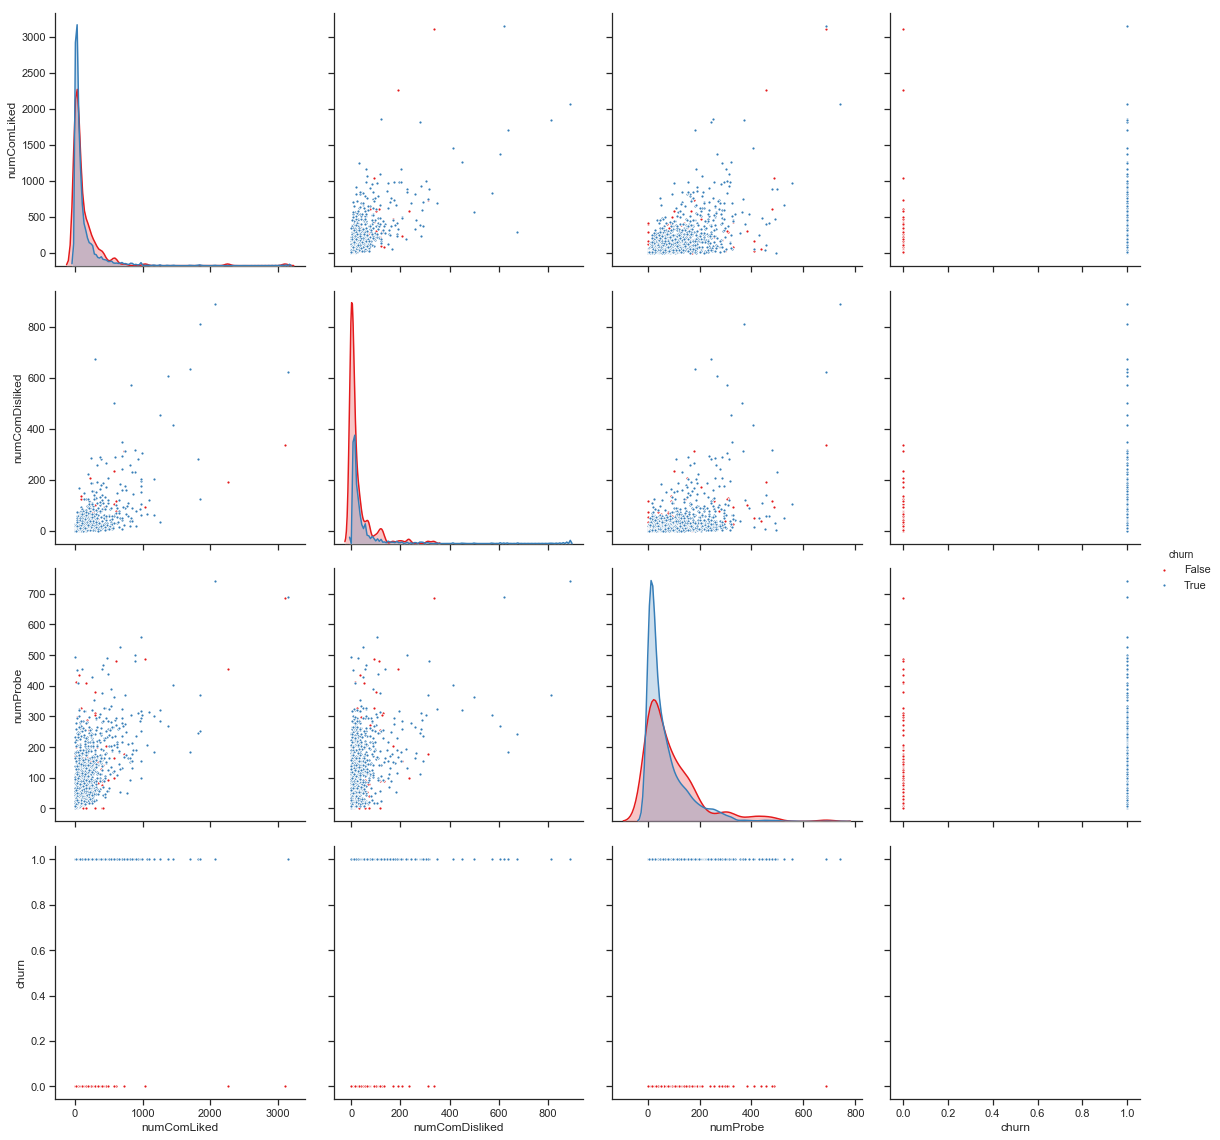

In [62]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_full[['numComLiked','numProbe', 'churn' ]], 
             hue="churn", 
             height=4,
             palette="Set1",
             markers=".")
plt.show()

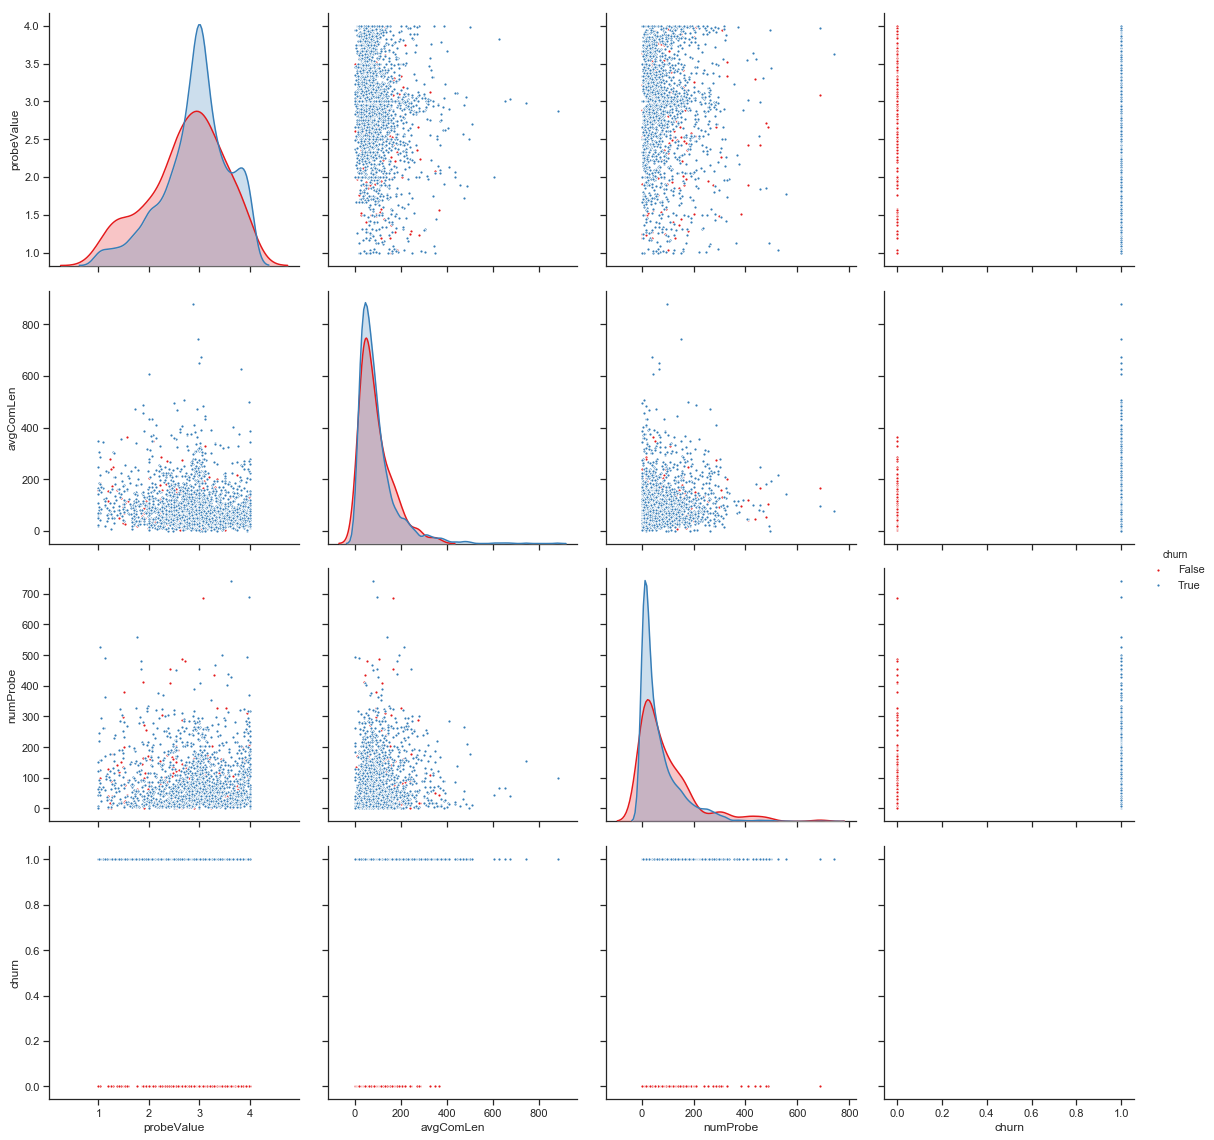

In [98]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_full[['probeValue','avgComLen','numProbe', 'churn' ]], 
             hue="churn", 
             height=4,
             palette="Set1",
             markers=".")
plt.show()

In [ ]:
# Observation: People who churn tend to vote less and write slightly longer comments.

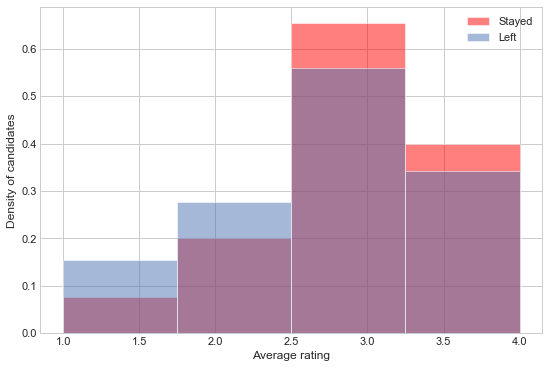

In [97]:

df_full['probeValue_churn'] = np.where(df_full['churn']==False, df_full['probeValue'], float(-1.))
df_full['probeValue_stay'] = np.where(df_full['churn']==True, df_full['probeValue'], float(-1.))

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(9,6))

plt.hist(x='probeValue_stay', data= df_full, bins=4, range=(1,4),alpha=0.5, label='Stayed', color='red', density='True')
plt.hist(x='probeValue_churn', data= df_full, bins=4, range=(1,4),alpha=0.5, label='Left', density='True')

plt.legend(loc='upper right')
plt.xlabel("Average rating")
plt.ylabel("Density of candidates")
#plt.ylim(0,0.04)
plt.show()




In [ ]:
# Observation: People who stay, tend to give hire happiness ratings.

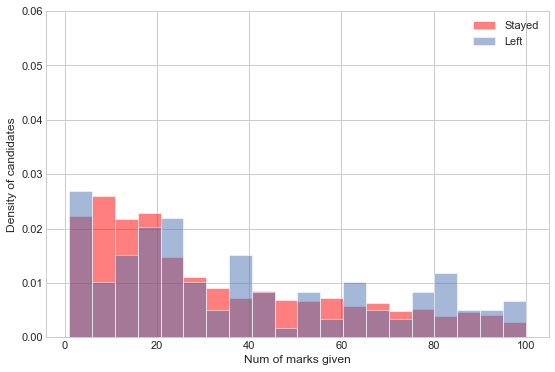

In [64]:

df_full['numProbe_churn'] = np.where(df_full['churn']==False, df_full['numProbe'], float(-1.))
df_full['numProbe_stay'] = np.where(df_full['churn']==True, df_full['numProbe'], float(-1.))

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(9,6))

plt.hist(x='numProbe_stay', data= df_full, bins=20, range=(1,100),alpha=0.5, label='Stayed', color='red', density='True')
plt.hist(x='numProbe_churn', data= df_full, bins=20, range=(1,100),alpha=0.5, label='Left', density='True')

plt.legend(loc='upper right')
plt.xlabel("Num of marks given")
plt.ylabel("Density of candidates")
plt.ylim(0,0.06)
plt.show()





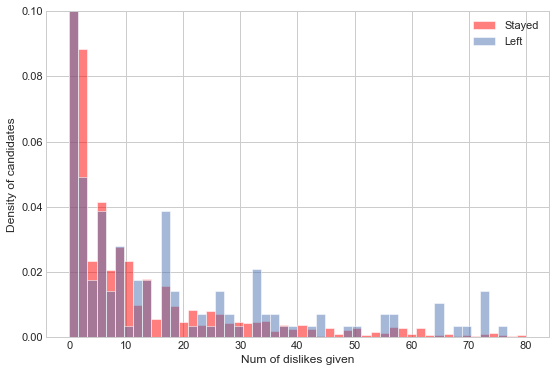

In [65]:

df_full['numComDisliked_churn'] = np.where(df_full['churn']==False, df_full['numComDisliked'], float(-1.))
df_full['numComDisliked_stay'] = np.where(df_full['churn']==True, df_full['numComDisliked'], float(-1.))

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(9,6))

plt.hist(x='numComDisliked_stay', data= df_full, bins=50, range=(0,80),alpha=0.5, label='Stayed', color='red', density='True')
plt.hist(x='numComDisliked_churn', data= df_full, bins=50, range=(0,80),alpha=0.5, label='Left', density='True')

plt.legend(loc='upper right')
plt.xlabel("Num of dislikes given")
plt.ylabel("Density of candidates")
plt.ylim(0,0.10)
plt.show()


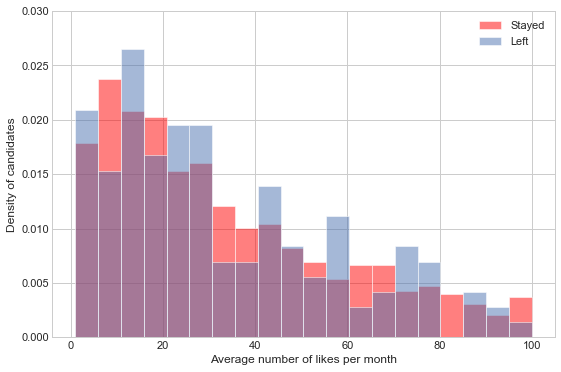

In [66]:

df_full['likesPerMonth_churn'] = np.where(df_full['churn']==False, df_full['likesPerMonth'], float(-1.))
df_full['likesPerMonth_stay'] = np.where(df_full['churn']==True, df_full['likesPerMonth'], float(-1.))

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(9,6))

plt.hist(x='likesPerMonth_stay', data= df_full, bins=20, range=(1,100),alpha=0.5, label='Stayed', color='red', density='True')
plt.hist(x='likesPerMonth_churn', data= df_full, bins=20, range=(1,100),alpha=0.5, label='Left', density='True')

plt.legend(loc='upper right')
plt.xlabel("Average number of likes per month")
plt.ylabel("Density of candidates")
plt.ylim(0,0.03)
plt.show()





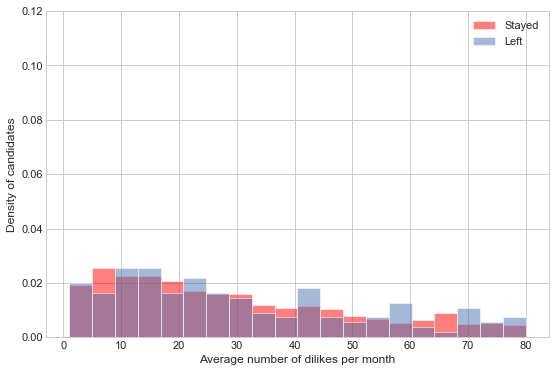

In [67]:

df_full['dislikesPerMonth_churn'] = np.where(df_full['churn']==False, df_full['dislikesPerMonth'], float(-1.))
df_full['dislikesPerMonth_stay'] = np.where(df_full['churn']==True, df_full['dislikesPerMonth'], float(-1.))

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(9,6))

plt.hist(x='dislikesPerMonth_stay', data= df_full, bins=20, range=(1,80),alpha=0.5, label='Stayed', color='red', density='True')
plt.hist(x='dislikesPerMonth_churn', data= df_full, bins=20, range=(1,80),alpha=0.5, label='Left', density='True')

plt.legend(loc='upper right')
plt.xlabel("Average number of dilikes per month")
plt.ylabel("Density of candidates")
plt.ylim(0,0.12)
plt.show()





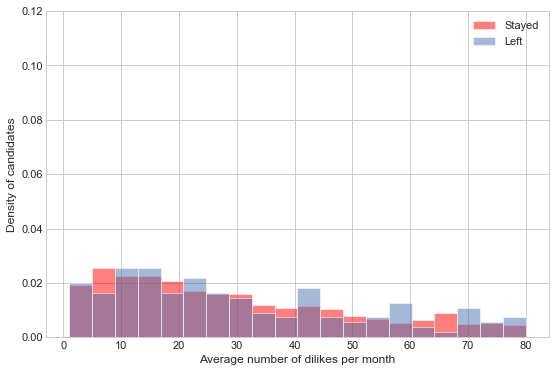

In [67]:

df_full['dislikesPerMonth_churn'] = np.where(df_full['churn']==False, df_full['dislikesPerMonth'], float(-1.))
df_full['dislikesPerMonth_stay'] = np.where(df_full['churn']==True, df_full['dislikesPerMonth'], float(-1.))

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(9,6))

plt.hist(x='dislikesPerMonth_stay', data= df_full, bins=20, range=(1,80),alpha=0.5, label='Stayed', color='red', density='True')
plt.hist(x='dislikesPerMonth_churn', data= df_full, bins=20, range=(1,80),alpha=0.5, label='Left', density='True')

plt.legend(loc='upper right')
plt.xlabel("Average number of dilikes per month")
plt.ylabel("Density of candidates")
plt.ylim(0,0.12)
plt.show()





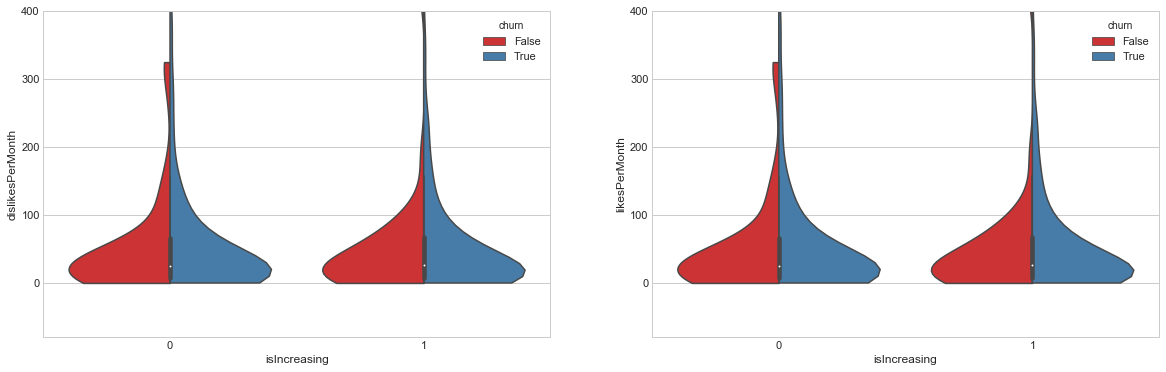

In [99]:
fig = plt.figure(figsize=(20,6))
plt.style.use('seaborn-whitegrid')

plt.subplot(1, 2, 1)
sns.violinplot(x='isIncreasing', y='dislikesPerMonth', hue='churn', data=df_full, split=True, scale='width', palette="Set1", cut=0);
plt.ylim(-80, 400)
plt.subplot(1, 2, 2)
sns.violinplot(x='isIncreasing', y='likesPerMonth', hue='churn', data=df_full, split=True, scale='width', palette="Set1", cut=0);
plt.ylim(-80, 400)
plt.show()


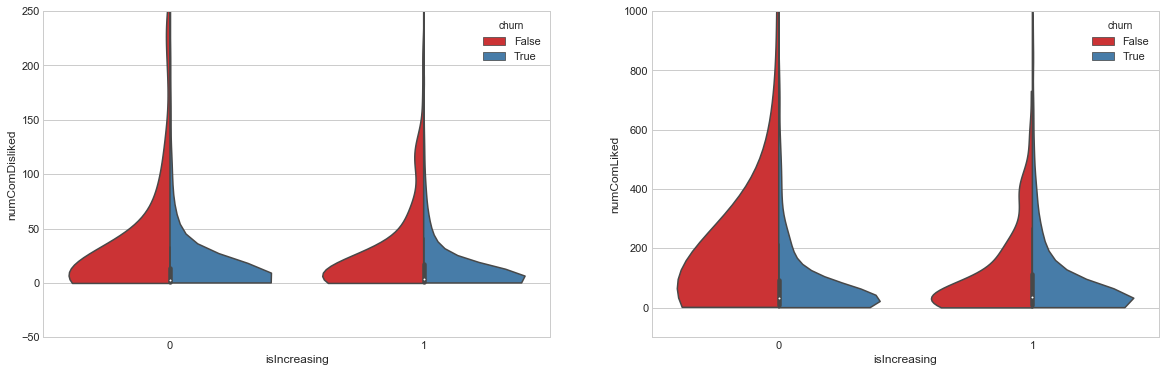

In [101]:
fig = plt.figure(figsize=(20,6))
plt.style.use('seaborn-whitegrid')

plt.subplot(1, 2, 1)
sns.violinplot(x='isIncreasing', y='numComDisliked', hue='churn', data=df_full, split=True, scale='width', palette="Set1", cut=0);
plt.ylim(-50,250)
plt.subplot(1, 2, 2)
sns.violinplot(x='isIncreasing', y='numComLiked', hue='churn', data=df_full, split=True, scale='width', palette="Set1", cut=0);
plt.ylim(-100, 1000)
plt.show()


In [ ]:
# Observation: No matter which comment reaction they have (good or bad), the more they interact, the more they are likely to stay.

In [ ]:
# Observation: No matter which comment reaction they have (good or bad), the more they interact, the more they are likely to stay.

In [90]:
df_full


employeeID  probeValue  probeDayOfWeek  probeDayOfYear  isFirstTerm  \
0          10_1    3.309735        2.619469      203.911504     0.486726   
1         10_18    3.295082        2.213115      187.262295     0.540984   
2          10_2    3.272727        2.666667      224.424242     0.242424   
3          10_3    3.155556        2.466667      232.133333     0.333333   
4         10_30    3.214286        2.785714      228.071429     0.357143   
5         10_32    3.111111        2.111111      183.111111     0.555556   
6         10_34    4.000000        3.500000      343.500000     0.500000   
7         10_35    3.000000        4.000000      351.000000     1.000000   
8         10_35    3.000000        4.000000      351.000000     1.000000   
9         10_37    4.000000        2.200000       22.400000     0.200000   
10        10_38    3.722222        2.305556       50.000000     0.500000   
11        10_39    3.800000        2.500000       43.000000     0.500000   
12        10_48    4.000000        2.000000       55.333333     0.333333   
13        10_50    3.320000        2.160000       62.120000     0.520000   
14        10_56    4.000000        4.500000       69.500000     0.500000   
15        10_58    3.142857        2.857143       69.857143     0.285714   
16        10_60    4.000000        0.500000       69.000000     0.500000   
17        10_61    2.500000        3.000000       71.500000     0.500000   
18        10_79    3.755556        2.688889      123.133333     0.844444   
19         10_8    3.845455        2.281818      201.745455     0.545455   
20         10_9    3.790698        2.430233      193.465116     0.534884   
21       11_101    3.973837        2.924419      181.736919     0.537791   
22       11_103    2.263889        2.208333      124.722222     0.555556   
23       11_110    3.442000        2.906000      180.994000     0.754000   
24       11_112    1.772401        2.915771      180.648746     0.551971   
25       11_113    2.235294        2.411765      159.823529     0.235294   
26       11_115    1.766667        2.541667      208.500000     0.675000   
27       11_117    1.036122        2.952471      185.566540     0.627376   
28       11_118    3.000000        3.000000      340.666667     0.666667   
29       11_118    3.000000        3.000000      340.666667     0.666667   
...         ...         ...             ...             ...          ...   
2560       9_39    3.031250        1.875000      215.218750     0.218750   
2561        9_4    3.802083        2.010417      220.010417     0.479167   
2562       9_40    3.184211        1.907895      260.763158     0.302632   
2563       9_42    3.411765        2.617647      217.617647     0.441176   
2564       9_45    3.583784        2.594595      217.572973     0.464865   
2565        9_5    3.459459        2.072072      213.261261     0.360360   
2566       9_53    2.878049        2.256098      234.621951     0.182927   
2567       9_54    2.800000        1.700000      255.600000     0.300000   
2568       9_55    2.787879        2.121212      240.545455     0.090909   
2569        9_6    3.993056        3.041667      200.006944     0.493056   
2570       9_67    2.954545        1.454545       92.909091     0.863636   
2571       9_68    3.474138        2.094828      223.060345     0.474138   
2572       9_69    3.061404        1.947368      172.614035     0.570175   
2573        9_7    3.964824        2.597990      206.185930     0.547739   
2574       9_71    3.851852        2.259259      193.370370     0.333333   
2575       9_75    3.445378        2.100840      225.529412     0.394958   
2576       9_78    3.409639        2.301205      239.722892     0.301205   
2577        9_8    3.745856        2.303867      218.524862     0.458564   
2578       9_80    3.080808        2.373737      199.333333     0.484848   
2579       9_83    2.892857        2.392857      228.035714     0.250000   
2580       9_85    2.776119        1.925373      236.

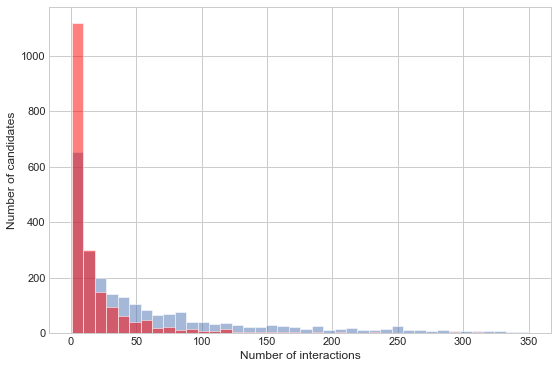

In [104]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(9,6))

plt.hist(x='numComLiked', data = df_full, bins=40, alpha=0.5, range=(1,350))
plt.hist(x='numComDisliked', data = df_full, bins=40, alpha=0.5, color='red', range=(1,350))

plt.legend(loc='upper right')
plt.xlabel("Number of interactions")
plt.ylabel("Number of candidates")
plt.show()


In [69]:
# Observation: people tend to give more likes than dislikes. The ones that give likes have way more interactions on average.

In [111]:
df_full = df_full.drop(['isFirstTerm','meanProbeValueT1','meanProbeValueT2','isFirstTerm','companyID_x','lastDateMonth', 'numComLiked_churn', 'numComLiked_stay','numComDisliked_churn', 'numComDisliked_stay', 'numProbe_churn','numProbe_stay', 'likesPerMonth_churn', 'likesPerMonth_stay', 'dislikesPerMonth_churn', 'dislikesPerMonth_stay', 'probeValue_churn', 'probeValue_stay' ], 1)

In [112]:
df_full.to_csv('for_training.csv', sep=',')

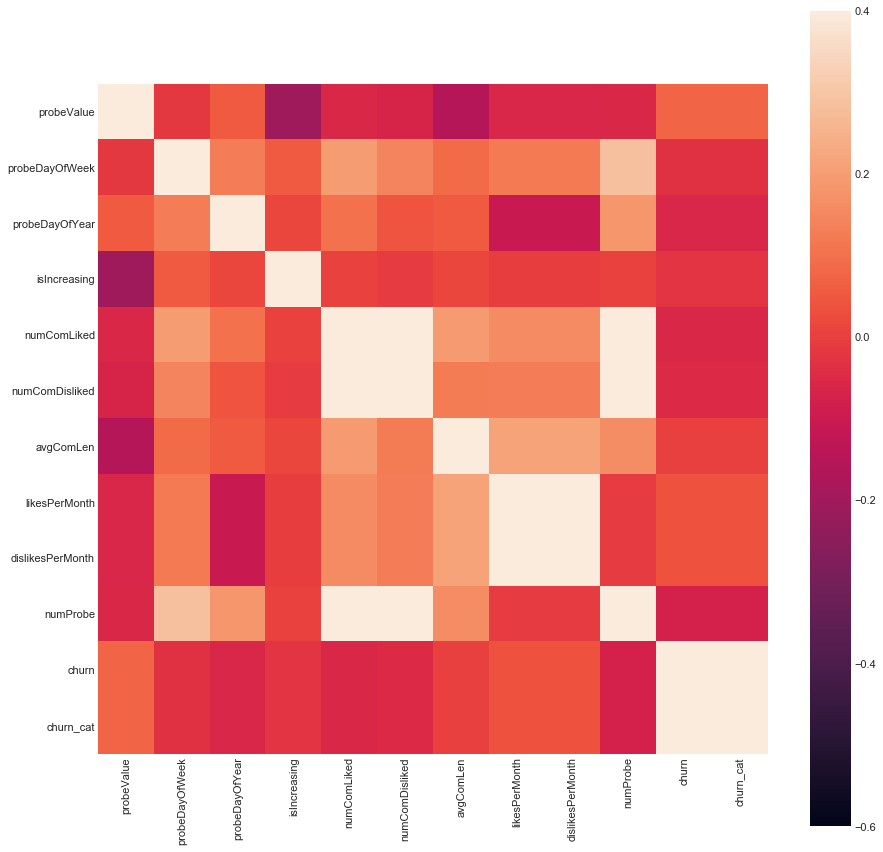

In [113]:

plt.figure(figsize=(15,15)) 
sns.heatmap(df_full.corr(), square=True, vmax= 0.4, vmin=-0.6)
plt.show()

In [ ]:
# The features that seems to be the most correlated to churn are the happiness mark given (probe) 
# and the number of likes and dislikes the person gave per month.
# Surprisingly, the length of the comments seems to have more impact than the fact that the given rating 
# increased or not over the working period... 